## Food Hub Case Study
### The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. We are going to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience.

## Dataset Information:
### food_hub.csv: It contains information about the users ids, customer ids, cuisine type, restaurant name, cost of the order, preparation time and delivery time.

## Objective:
### To extract insights from the dataset.

## Learning Outcomes:¶
### Use of Pandas Functions - shape, describe, groupby, merge, loc etc.

### Let us start by importing the required libraries

In [164]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [166]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** Write the code to check the shape of the dataset and write your observations based on that. (0.5 mark)

In [167]:
df.shape

(1898, 9)

#### Observations: 
The dataset has 1898 rows and 9 columns.

### Question 2: Write the observations based on the below output from the info() method. (0.5 mark)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* All columns have 1898 entries indicating that there is no missing values.
* restaurant_name, cuisine_type, day_of_the_week and rating have object data type.
* cost_of_the_order is of 'Float" data type.
* order_id, customer_id, food_preparation_time and delivery_time have numerical data type.

### Question 3: 'restaurant_name', 'cuisine_type', 'day_of_the_week' are object types. Write the code to convert the mentioned features to 'category' and write your observations on the same. (0.5 mark)

In [169]:
df['restaurant_name'] = df.restaurant_name.astype('category')
df['cuisine_type'] = df.cuisine_type.astype('category')
df['day_of_the_week'] = df.day_of_the_week.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


#### Observations:
The columns of 'restaurant_name', 'cuisine_type' and 'day_of_the_week' has been converted from "object" to categorical data. This will help to reduce the data space to store the above dataframe. The dataframe intially was 133.6+KB and after converting the data,it became 102.7+KB

### **Question 4:** Write the code to find the summary statistics and write your observations based on that. (1 mark)

In [170]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
* There is huge difference between the maximum and the 3rd quartile value for the 'cost_of_the_order', 'food_preparation_time' and 'delivery_time' indicating positive skewness.
* The minimum order on the food('cost_of_the_order) is 4.47 dollars.
* It takes minimum of 20 minutes to prepare any kind of cuisine(food_preparation_time).
* The delivery time range from 15 minutes to 33 minutes.

### **Question 5:** How many orders are not rated? (0.5 mark)

In [171]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
* There are totally 4 kinds of ratings.
* 736 customers have not rated the restaurants for the order they placed.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on the distributions of all the relevant variables in the dataset. (5 marks)

<AxesSubplot:xlabel='food_preparation_time'>

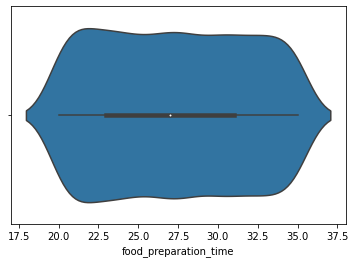

In [172]:
# To find out how the distribution of the column 'food_preparation_time' varies in the dataframe given to us.
# We will use violin plot for this distrubution. 
df_prep = df['food_preparation_time']
df_prep
sns.violinplot(df_prep)

* After performing the univariate analysis on food preparation time and observing the output plot, we can draw the following conclusion. 
* There are no outliers in preparation time
* Preparation time range from 20 minutes to 35 minutes
* 50% of the order preparation time for all type of cuisines range from 23 minutes to 31 minutes

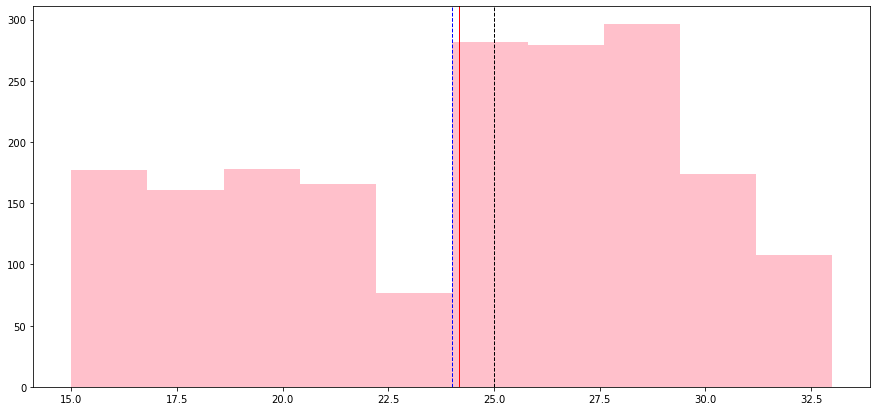

In [173]:
#To findout how the delivery time has varied across the dataframe. 
#We plot a simple histogram with wider plot size.
#First we will create the column for which we want to work on, here we are going to use the values of 'delivery_time'. column.
df_deltime = df['delivery_time']
df_deltime
plt.figure(figsize=(15,7))
plt.hist(df_deltime, color='pink')
plt.axvline(df_deltime.mean(), color='r', linewidth=1)
plt.axvline(df_deltime.median(), color='black', linestyle='dashed', linewidth=1)
plt.axvline(df_deltime.mode()[0], color='blue', linestyle='dashed', linewidth=1)

* The delivery time range from 15 minutes to 33 minutes.
* The above histogram tells us most of the orders have been delivered by 25 minutes after placing the order. 
* This plot also tells us that if use this app, average time for the orders to be delivered to your door is about 24 minutes.

(array([483.,  77., 584., 371.,  46., 215.,  68.,  17.,  18.,  19.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
 <BarContainer object of 10 artists>)

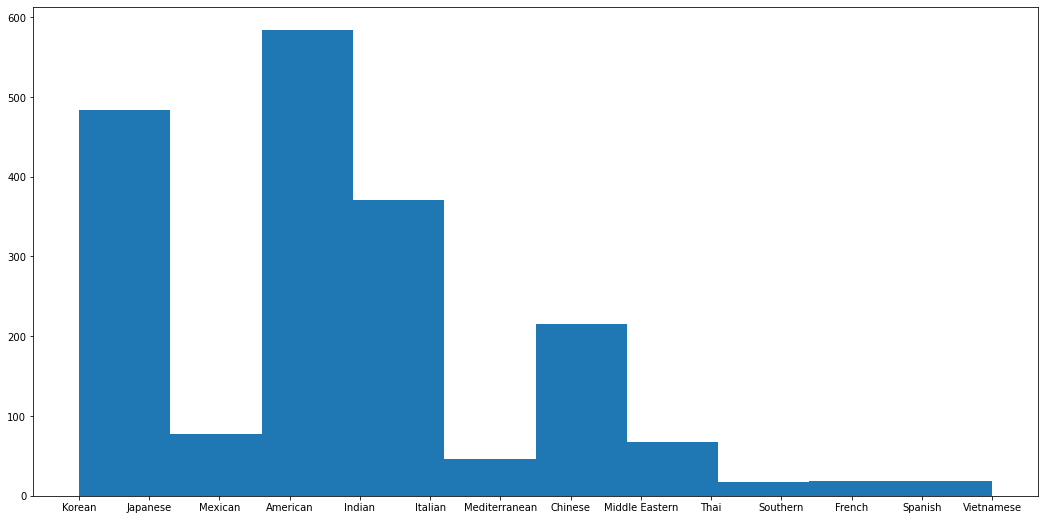

In [174]:
#To find out how the cuisine type of food has been distributed in the dataframe, we shall use the distplot method.
plt.figure(figsize=(18,9))
plt.hist(df['cuisine_type'])

* American cuisine is most popular cuisine followed by Korean, Japanese, Indian, and Italian cuisines. 

(array([1351.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         547.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

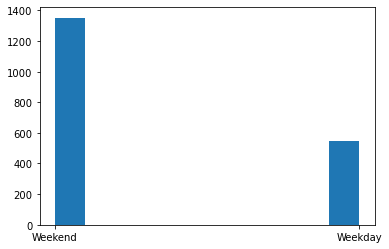

In [175]:
#Lets us find out when is the popular day of the week that food is ordered.
plt.hist(df['day_of_the_week'])

* We can see here most of the orders on the food are placed on the weekends. 
* There is very less food ordered during the weekdays. 

### Question 7: Write the code to find the top 5 restaurants that have received the highest number of orders. (1 mark)

In [176]:
df['restaurant_name'].value_counts().head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
* The top 5 restaurants which have the highest order are
- Shake Shack
- The Meatball Shop
- Blue Ribbon Sushi
- Blue Ribbon Fried Chicken
- Parm


### Question 8: Write the code to find the most popular cuisine on weekends. (1 mark)

In [177]:
df_weekend = df.loc[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts()


American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:
* The most popular cuisine on the weekend is American followed by Japanese and Italian.

### Question 9: Write the code to find the number of total orders where the cost is above 20 dollars. What is the percentage of such orders in the dataset?  (1 mark)

In [178]:
df_20 = df[df['cost_of_the_order']>20].reset_index()
df_20

,index,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
2,5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
3,12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17
4,17,1477373,139885,Blue Ribbon Sushi Izakaya,Japanese,33.03,Weekend,Not given,21,22
...,...,...,...,...,...,...,...,...,...,...
550,1884,1477437,304993,Shake Shack,American,31.43,Weekend,3,31,24
551,1885,1477550,97324,Shake Shack,American,29.05,Weekday,4,27,29
552,1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29,21
553,1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17


In [179]:
# To find the percentage of the orders greater than 20 dollars in the dataset.
555/1898 *100

29.24130663856691

#### Observations:
* There are 555 orders which have the cost of more than 20 dollars.
* 29 percent of the orders in the dataset cost more than 20 dollars.

### Question 10: Write the code to find the mean delivery time based on this dataset. (1 mark)

In [180]:
df['delivery_time'].mean()

24.161749209694417

#### Observations:
* The average delivery time of the orders in the dataset is 24 minutes.

### Question 11: Suppose the company has decided to give a free coupon of 15 dollars to the customer who has spent the maximum amount on a single order. Write the code to find the ID of the customer along with the order details. (1 mark)

In [181]:
df[['cost_of_the_order']].idxmax()

cost_of_the_order    573
dtype: int64

In [182]:
df.iloc[570:575]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
570,1478135,276431,The Meatball Shop,Italian,14.02,Weekday,5,20,27
571,1477254,58898,Blue Ribbon Sushi,Japanese,8.10,Weekend,5,35,18
572,1477705,60397,Jack's Wife Freda,Mediterranean,12.18,Weekend,3,33,23
573,1477814,62359,Pylos,Mediterranean,35.41,Weekday,4,21,29
574,1478059,53947,Gaia Italian Cafe,Italian,8.78,Weekend,Not given,25,15


#### Observations:
* Customer ID 62359 placed the single order with maximum cost value of 35.41 dollars. 
* The order was placed at Pylos mediterranean restaurant that was prepared in 21 minutes and deliverd in 29 minutes. 
* The customer provided a rating of 4 for this order. 

### Multivariate Analysis

### Question 12: Perform bivariate/multivariate analysis to explore relationships between the important variables in the dataset. (7 marks)

<AxesSubplot:xlabel='food_preparation_time', ylabel='delivery_time'>

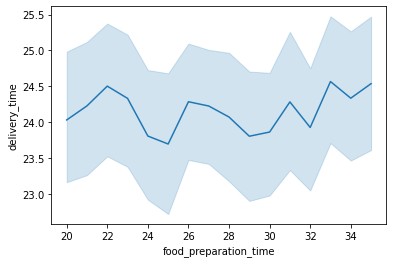

In [183]:
# We shall see how food preparation time and varied with delivery time.
sns.lineplot(x='food_preparation_time',y='delivery_time', data=df)


#### Observations:
* It takes an average of 24 minutes to deliver for foods ranging in preparation time from 20 minutes to 35 minutes. 

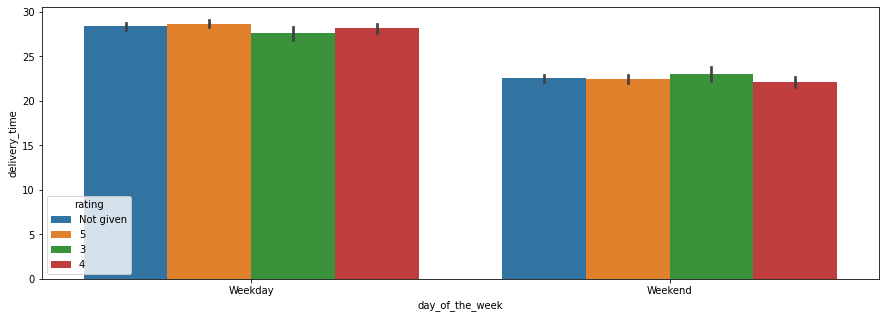

In [184]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x='day_of_the_week',y='delivery_time',hue='rating')
plt.show()

#### Observations:
* From the above plot, one can decifer that there are many restaurants which dont have rating.
* One can also tell most of the restaurants which have had rating of 5, their food has been delivered within 27 minutes on a weekday and 22 minutes on a weekend,so there is not much difference in the delivery time on the weekdays and weekends.

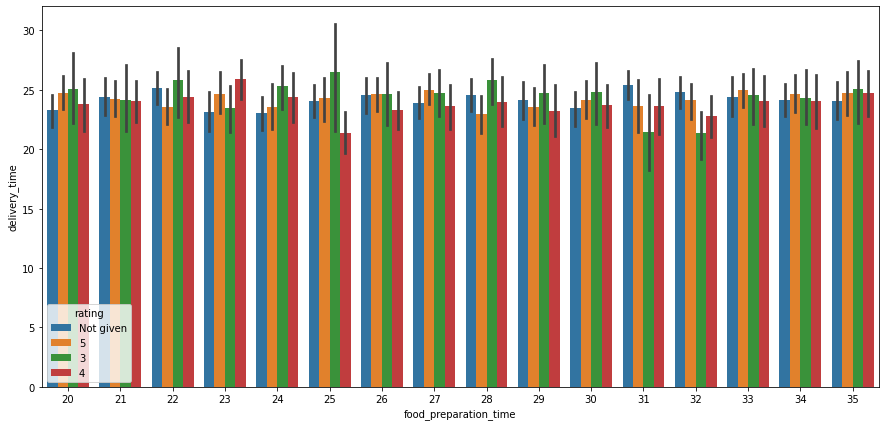

In [185]:
plt.figure(figsize=(15,7))
sns.barplot(data=df,x='food_preparation_time',y='delivery_time',hue='rating')
plt.show()

#### Observations:
* For rating of 3, the delivery time varied significantly within the same preparation time. For example, for preparation time of 25 minutes with rating of 3, the delivery time ranged from 22 minutes to 31 minutes. 
* It is also evident that food which have had a rating of 5 has taken less time to deliver.

<AxesSubplot:xlabel='cuisine_type', ylabel='cost_of_the_order'>

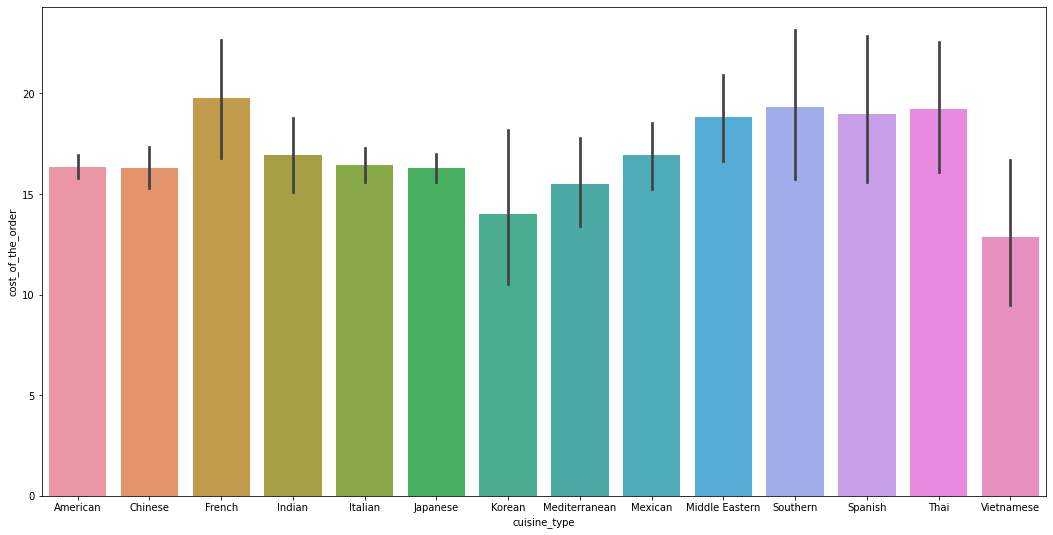

In [186]:
# We will compare the columns of 'cuisine_type' and the 'cost_of_the_order' by using barplot.
plt.figure(figsize=(18,9))
sns.barplot(df['cuisine_type'],df['cost_of_the_order'])

#### Observations:
* Vietnamese is the least expensive cuisine while French cuisine is the most expensive. 
* Thai, Southern, Spanish and Middle Eastern have the second highest expensive food.
* American, Chinese, Italian, Japanese and Mexican cuisines range the same in their cost of food.
* We see that the IQR for Korean, Southern, Spanish and Vietnamese are high indicating that they have items in their menus which are highly priced. It also indicates that the customers have ordered less items in their order, but it has costed them more.

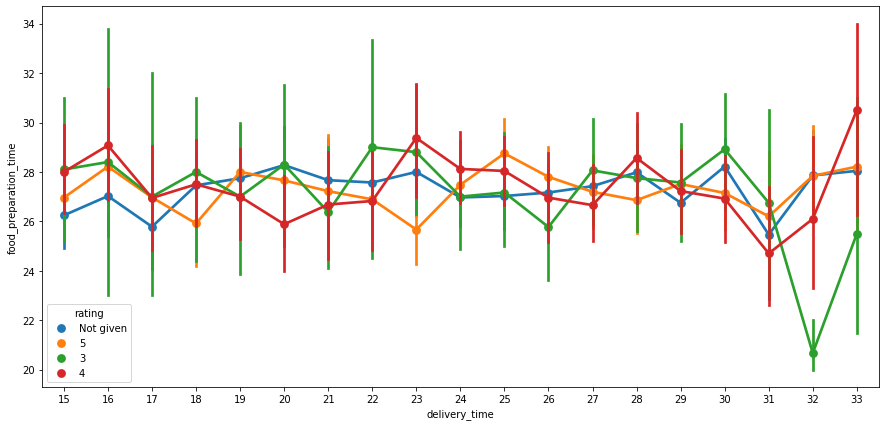

In [187]:
#To find out the distribution is between 2 numerical column datas and 1 categorical data.
plt.figure(figsize=(15,7))
sns.pointplot(x="delivery_time", y="food_preparation_time", hue = 'rating',  data=df)
plt.show()

#### Observations:
* We can see here that some of the restaurants have multiple ratings.
* We can deduce that the relationship of these variables are pretty unclear as some of the orders despite being prepared early and had late delivery have had high rating for it and vice versa.

In [188]:
# To get a clear picture,lets try to see the correlation between the variables gives us a clear picture.
df.corr()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
order_id,1.000000,-0.013960,0.021171,-0.007026,0.009690
customer_id,-0.013960,1.000000,-0.001322,-0.030330,-0.009885
cost_of_the_order,0.021171,-0.001322,1.000000,0.041527,-0.029949
food_preparation_time,-0.007026,-0.030330,0.041527,1.000000,0.011094
delivery_time,0.009690,-0.009885,-0.029949,0.011094,1.000000


<AxesSubplot:>

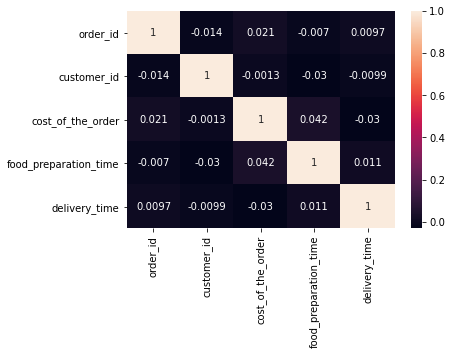

In [189]:
sns.heatmap(df.corr(), annot=True)

### Question 13: Suppose the company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Write the code to find the restaurants fulfilling the criteria to get the promotional offer. (2 marks)

* We realize here that 'rating' column is of object type and hence it cannot be counted.
* So we need to convert it into 'int', before we do that we need to remove the missing values.

In [190]:
df_new = df.loc[df['rating'] != 'Not given']

In [191]:
df_new['rating'] = df_new.rating.astype('int')
df_new.count()

order_id                 1162
customer_id              1162
restaurant_name          1162
cuisine_type             1162
cost_of_the_order        1162
day_of_the_week          1162
rating                   1162
food_preparation_time    1162
delivery_time            1162
dtype: int64

* The rows have reduced from 1898 rows to 1162 rows. So the rows which had no ratings have been removed.

In [192]:
#To find the mean of the restaurants as rating_mean.
rating_mean = pd.DataFrame(df_new.groupby(['restaurant_name'])['rating'].mean())
rating_mean.head()

,rating
restaurant_name,
'wichcraft,5.0
12 Chairs,4.5
5 Napkin Burger,4.0
67 Burger,5.0
Alidoro,NaN


In [193]:
# To find out the rating of the restaurants which have a rating of 4 and above.
rating_4_above = rating_mean.loc[rating_mean['rating']>4].reset_index()
rating_4_above

,restaurant_name,rating
0,'wichcraft,5.000000
1,12 Chairs,4.500000
2,67 Burger,5.000000
3,Amma,4.500000
4,Anjappar Chettinad,5.000000
...,...,...
105,Yama 49,5.000000
106,Yama Japanese Restaurant,4.500000
107,da Umberto,5.000000
108,ilili Restaurant,4.153846


In [194]:
# We will form a new dataframe with restaurants.
df_rating_count = df_new['restaurant_name'].value_counts().reset_index()
df_rating_count.head()

,index,restaurant_name
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [195]:
# To find the restaurants which have a rating count of more than 50.
rating_cnt_50_above = df_rating_count.loc[df_rating_count['restaurant_name']>50]
rating_cnt_50_above

,index,restaurant_name
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64


In [196]:
# We will form a dataframe by putting these two columns together and then merge them as inner.
rating_cnt_50_above.columns = ['restaurant_name','rating_count']
df_merge = rating_4_above.merge(rating_cnt_50_above, on = 'restaurant_name', how = 'inner')
df_merge

,restaurant_name,rating,rating_count
0,Blue Ribbon Fried Chicken,4.328125,64
1,Blue Ribbon Sushi,4.219178,73
2,Shake Shack,4.278195,133
3,The Meatball Shop,4.511905,84


#### Observations:
* The company who wants to offer the promotional offer to those restaurants which have atleast a rating of 4 and a count of ratings of more than 50 are
1. Blue Ribbon Fried Chicken.
2. Blue Ribbon Sushi.
3. Shake Shack.
4. The Meatball Shop.

### Question 14: Suppose the company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Write the code to find the net revenue generated on all the orders given in the dataset. (2 marks)

In [197]:
# To find the total sum of the column 'cost_of _the _order'.
df['cost_of_the_order'].sum()

31314.82

In [198]:
#To create a dataframe of orders which has costed 20 dollars or more.
df_20 = df.loc[df['cost_of_the_order']>=20]
df_20

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17
17,1477373,139885,Blue Ribbon Sushi Izakaya,Japanese,33.03,Weekend,Not given,21,22
...,...,...,...,...,...,...,...,...,...
1884,1477437,304993,Shake Shack,American,31.43,Weekend,3,31,24
1885,1477550,97324,Shake Shack,American,29.05,Weekday,4,27,29
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29,21
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17


In [199]:
#Adding a new column to the dataframe with a 25 percent charge by the company for orders greater than 20 dollars or more.
df_20 = df_20.assign(Rev_25=df_20['cost_of_the_order']*0.25)
df_20

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Rev_25
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24,6.3050
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17,6.0750
17,1477373,139885,Blue Ribbon Sushi Izakaya,Japanese,33.03,Weekend,Not given,21,22,8.2575
...,...,...,...,...,...,...,...,...,...,...
1884,1477437,304993,Shake Shack,American,31.43,Weekend,3,31,24,7.8575
1885,1477550,97324,Shake Shack,American,29.05,Weekday,4,27,29,7.2625
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29,21,7.2875
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17,5.5775


In [200]:
#To find the sum of the new column
percent_25 = df_20['Rev_25'].sum()
percent_25

3688.7275

In [201]:
#To create a dataframe of orders which has costed less than 20 dollars.
df_a = df.loc[df['cost_of_the_order']<20]
df_a

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
...,...,...,...,...,...,...,...,...,...
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5,20,22
1891,1476981,138586,Shake Shack,American,5.82,Weekend,Not given,22,28
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


In [202]:
#To create a dataframe of orders which has costed 5 dollars or more from the previous dataframe.
df_15 = df_a.loc[df_a['cost_of_the_order']>5]
df_15

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
...,...,...,...,...,...,...,...,...,...
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5,20,22
1891,1476981,138586,Shake Shack,American,5.82,Weekend,Not given,22,28
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


In [203]:
#Adding a new column to the dataframe with a 15 percent charge by company for orders greater than 5 but less than 20 dollars.
df_15 = df_15.assign(Rev_15=df_15['cost_of_the_order']*0.15)
df_15

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Rev_15
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21,0.9105
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,0.8955
...,...,...,...,...,...,...,...,...,...,...
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5,20,22,2.3505
1891,1476981,138586,Shake Shack,American,5.82,Weekend,Not given,22,28,0.8730
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19,1.8270
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31,1.8270


In [204]:
#To find the sum of the new column
percent_15 = df_15['Rev_15'].sum()
percent_15

2477.5755

In [205]:
#The net revenue generated by the company for the conditional orders.
percent_25 + percent_15

6166.303

#### Observations:
* A total of 31314.82 dollars were made by the orders placed among the various restaurants.
* The company made a total of 6166.303 dollars from the orders.

### Question 15: Suppose the company wants to analyze the total time required to deliver the food. Write the code to find out the percentage of orders that have more than 60 minutes of total delivery time. (2 marks)

Note: The total delivery time is the summation of the food preparation time and delivery time. 

In [206]:
# Let us add the two columns of the dataframe consisting of 'food_preparation_time' and 'delivery_time' into one column.
df['prep_del'] = df['food_preparation_time'] + df['delivery_time']
df.prep_del

0       45
1       48
2       51
3       40
4       49
        ..
1893    48
1894    50
1895    55
1896    54
1897    52
Name: prep_del, Length: 1898, dtype: int64

In [207]:
# To find out how many orders have more than 60 minutes of total delivery time.
df.loc[df.prep_del>60]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,prep_del
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,63
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,Not given,34,28,62
19,1477354,67487,Blue Ribbon Sushi,Japanese,16.20,Weekend,4,35,26,61
24,1476714,363783,Cafe Mogador,Middle Eastern,15.86,Weekday,Not given,32,29,61
54,1477760,130507,Jack's Wife Freda,Mediterranean,22.75,Weekend,3,35,29,64
...,...,...,...,...,...,...,...,...,...,...
1869,1476923,50199,J. G. Melon,American,19.40,Weekday,4,35,26,61
1873,1478148,261371,Shake Shack,American,22.31,Weekend,Not given,35,28,63
1875,1478039,292343,Amy Ruth's,Southern,12.23,Weekday,Not given,32,33,65
1880,1477466,222734,Shake Shack,American,13.97,Weekend,5,35,27,62


In [208]:
200/1898*100

10.537407797681771

#### Observations:
* There are 200 orders that have had a total delivery time of more than 60 minutes.
* 10.537% of the orders have total delivery time of more than 60 minutes. 

### Question 16: Suppose the company wants to analyze the delivery time of the orders on weekdays and weekends. Write the code to find the mean delivery time on weekdays and weekends. Write your observations on the results. (2 marks)

In [209]:
# To find out how many orders are there on weekends and weekdays.
df['day_of_the_week'].value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

In [210]:
# To extract the orders placed on the weekends and weekdays as new dataframe.
df_wd = df.loc[df['day_of_the_week'] == 'Weekday']
df_wd

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,prep_del
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24,44
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,63
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5,21,26,47
...,...,...,...,...,...,...,...,...,...,...
1878,1477194,62540,Blue Ribbon Sushi,Japanese,5.92,Weekday,Not given,27,31,58
1885,1477550,97324,Shake Shack,American,29.05,Weekday,4,27,29,56
1889,1478190,94152,RedFarm Broadway,Chinese,8.68,Weekday,3,33,30,63
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24,55


In [211]:
df_w = df.loc[df['day_of_the_week'] == 'Weekend']
df_w

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,prep_del
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21,49
11,1478437,221206,Empanada Mama (closed),Mexican,8.10,Weekend,5,23,22,45
...,...,...,...,...,...,...,...,...,...,...
1891,1476981,138586,Shake Shack,American,5.82,Weekend,Not given,22,28,50
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29,21,50
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17,48
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19,50


In [212]:
# To find the mean delivery time on Weekdays and Weekends.
df_wd['delivery_time'].mean()


28.340036563071298

In [213]:
df_w['delivery_time'].mean()

22.4700222057735

#### Observations:
* The mean delivery time on the Weekdays is 28.34 minutes and on Weekends is 22.47 minutes.
* This tells that delivery is made quickers on weekends rather than weekdays. It should be probably be because of the traffic which is better on the weekends.

### **Question 17:** Write the conclusions and business recommendations derived from the analysis. (5 marks)

### Conclusions and Business Recommendations:
* Based on the given data, we can conclude that the minimum order for any type of cuisine is 4.47 dollars and there have been orders which have costed less than 10 dollars but to delivery them, it has taken minimum of 20 minutes which is a loss considering the amount of profit made for that order.
* Any order placed in the restaurant for any type of cuisine has taken minimum 20 minutes to prepare, the largest being 35 minutes to prepare them, so if the company could consolidate orders from the restaurants which are nearby each other, it would cost them less time to delivery to the people who are also living nearby then they can see some profit margin for them, this can also see in increase of a rating for that restaurant, thereby increasing the number of orders for that restaurants.
* From the above dataset most of the orders belongs to the cuisine type of Korean, Japanese, Italian with American and Indian being the most popular type of food to be ordered the most, so it highly recommended that they consolidate orders from these type of cuisines, so even if the delivery time increases and they can increase the numbers of orders, then there will be profit margin for them.
* The IQR for Korean, Southern, Spanish and Vietnamese are high indicating that they have items in their menus which are highly priced. We can infer that the customers have ordered less items in their order but it has costed them more, so there is no need to consolidated orders on these kinds of restaurants as the profit margin is relatively high for these type of cuisines orders.
* With the above calculations made from the above questions asked, we concluded that the company made around 20% profit for the total revenue generated with the all types of restaurants. It is recommended that they charge the restaurants 35% on orders 20 dollars or more and 20% on orders of 5 dollars or more, they profit margin will drastically increase. It is also recommended that there should be delivery on orders of minimum 10 dollars. This margin will sustain owing to the new changes which pandemic brought upon people's life, the company can take this measure to see their profit increase as people who have no time to cook will be forced to order food costing minimum of 10 dollars.


